<a href="https://www.kaggle.com/code/aziztaktak/gold-real-estate-v3-0?scriptVersionId=111408792" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<center><h1>HOUSE PRICE PREDICTION</h1></center>

<center><img src= "https://cdn.pixabay.com/photo/2016/11/18/17/46/house-1836070__480.jpg"></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # filter the warnings 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import metrics

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import RandomizedSearchCV

# Hello, this is our submission for the gold real estate LAB 1, We're using a different data set 
# than the one provided, the main differences are the addition of the 'grade' collumn and this data spans around 1 year (May 2014-May 2015) instead of 3 months.

There's also the addition of the lat & long features which are coordinates for the house.
Most of the features are explained through analysis & research in the notebook below.

# Loading the Dataset

In [2]:
df = pd.read_csv("/kaggle/input/housesalesprediction/kc_house_data.csv")

# Quick Glance at the Dataset

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df["date"] = pd.to_datetime(df["date"]) # convert the date column to right format
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Visualization

## Variable by Variable Analysis

In [9]:
def plotPerColumnDistribution(df1, nRows, nGraphPerRow):
    track = [[0]*nGraphPerRow]*nRows
    columnNames = df1.columns
        
    fig, ax = plt.subplots(nrows=nRows, ncols=nGraphPerRow, figsize=(20,10))
       
    row, col, i = 0,0,0
    while i<(len(columnNames)):
        if col<=nGraphPerRow-1:
            print(columnNames[i])
            valueCounts = df[columnNames[i]].value_counts().sort_index()
            valueCounts.plot(kind='bar', ax=ax[row][col])
            plt.ylabel('counts')
            plt.xticks(rotation = 90)
            ax[row][col].set_title(columnNames[i])
            col+=1
        else:
            col=0
            row+=1
            i-=1
        i+=1
            
    for j in range(col,nGraphPerRow):
        fig.delaxes(ax[row][j])
    
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

bedrooms
bathrooms
floors
waterfront
view
condition
grade


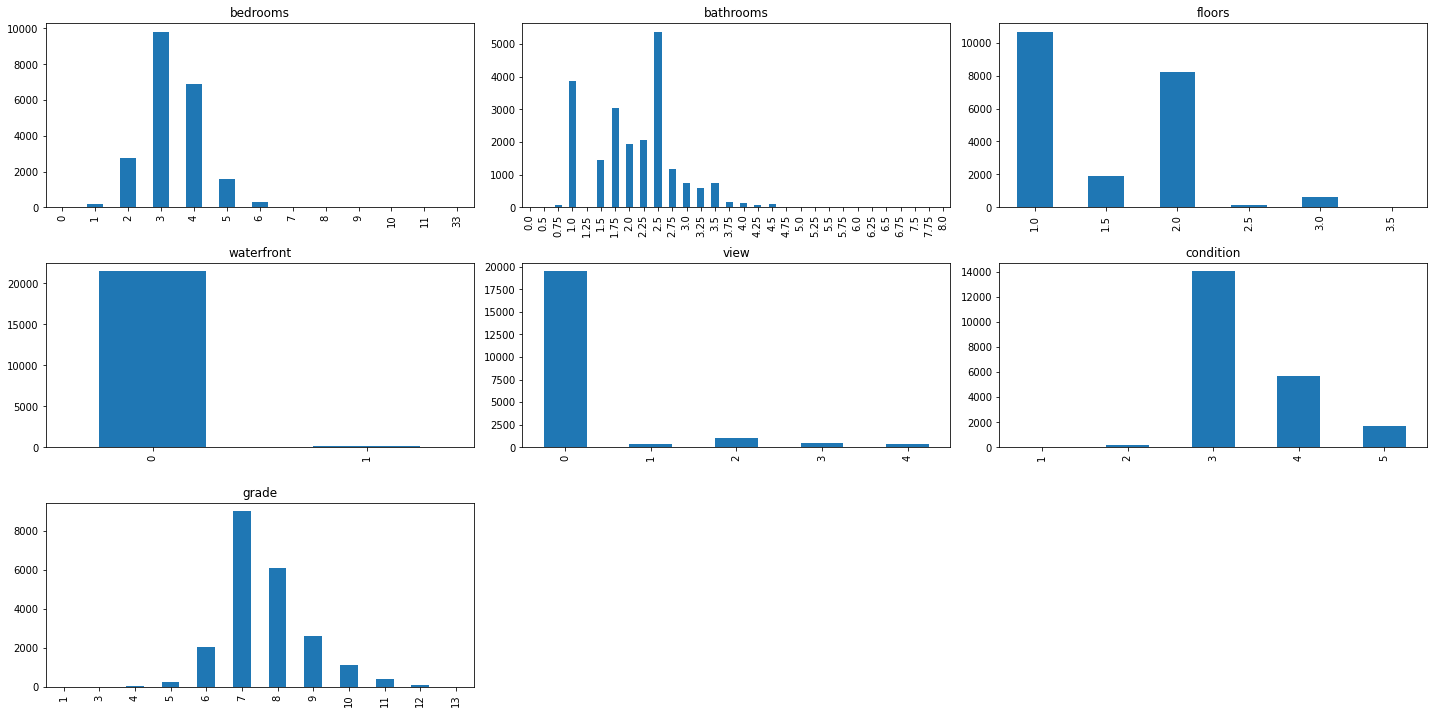

In [11]:
df1 = df[["bedrooms", "bathrooms", "floors","waterfront", "view", "condition", "grade"]]
plotPerColumnDistribution(df1,3,3) #(df, no od rows, now of fig per row)

## Insights:
1. __"Bedroom"__: Most of the houses contains 3 bedroom (3.3 on average),except few houses having bedrooms more then 7 and the count goes up to 33 bedroom, now this can be treated as outliers, but considering the fact that these can be some kind of luxerious houses let's keep these and see how our model is performing.

2. __"Bathroom"__: At first look it looks a bit odd why bathrooms have to be in floating points, but it make sence if we put it in this way:<br>
    before procedding further let us forst understand the "bathroom classification"<br>
    1.1: ___Full bathroom___: A bathroom will be considered as a full bathroom if it has this four main components:  a toilet, sink, bathtub, and shower or shower-bath combo.<br>
    1.2: ___Half bathroom___: It has only two of the four main bathroom components—typically a toilet and sink.<br>
    1.3: ___Three quarter bathroom___: It has one of the four component missing from the full bathroom i.e. bathtub.<br>
    1.4: ___Quarter bathroom___: A room with just one of the four elements—typically a toilet<br>
Now, lets puts this whole thing into the figure, so bathrooms with number like 1, 2, 3 and so on is self explanetory that those are full bathrooms, numbers like 1.5 it means 1 full bathroom and a half bathroom similarly 2.5 means 2 full and a half bathroom, numbers like 1.75 means 1 full and a three quarter bathroom and 1.25 means 1 full and a quarter bathroom. [Source: https://www.realtor.com/advice/buy/what-is-a-half-bath/]

3. __"Floors"__: The floor column contains floating values, which make sence if we put it in this way: <br>
    3.1: 1.5 floor mean 1 floan and a partial second floor. similarly 2.5 means 2 floors and a partial 3rd floor, 3.5 means 3 floors and a partial 4th floor.
    
4. __"Waterfront"__: It tells about the houses that are having view to a waterfront, its an categorical and we can see more than 99% of the houses are not having any waterfront view, we can drop this column as it will remain same for all the houses and will not add any significate value to our model.

5. __"View"__: Same goes for the view we can drop it as more then 90% of the data having the same value.

6. __"Grade"__: It can be some sort of grading given to each houses based on Gold Real Estate's grading system, we can have a bivariate analysis for this with price.

## Distribution

In [12]:
def plotDistribution(df1, nRows, nGraphPerRow):
    track = [[0]*nGraphPerRow]*nRows
    columnNames = df1.columns
        
    fig, ax = plt.subplots(nrows=nRows, ncols=nGraphPerRow, figsize=(20,10))
       
    row, col, i = 0,0,0
    while i<(len(columnNames)):
        if col<=nGraphPerRow-1:
            sns.histplot(df[columnNames[i]],ax=ax[row][col], kde=True)
            col+=1
        else:
            col=0
            row+=1
            i-=1
        i+=1
            
    for j in range(col,nGraphPerRow):
        fig.delaxes(ax[row][j])
    
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

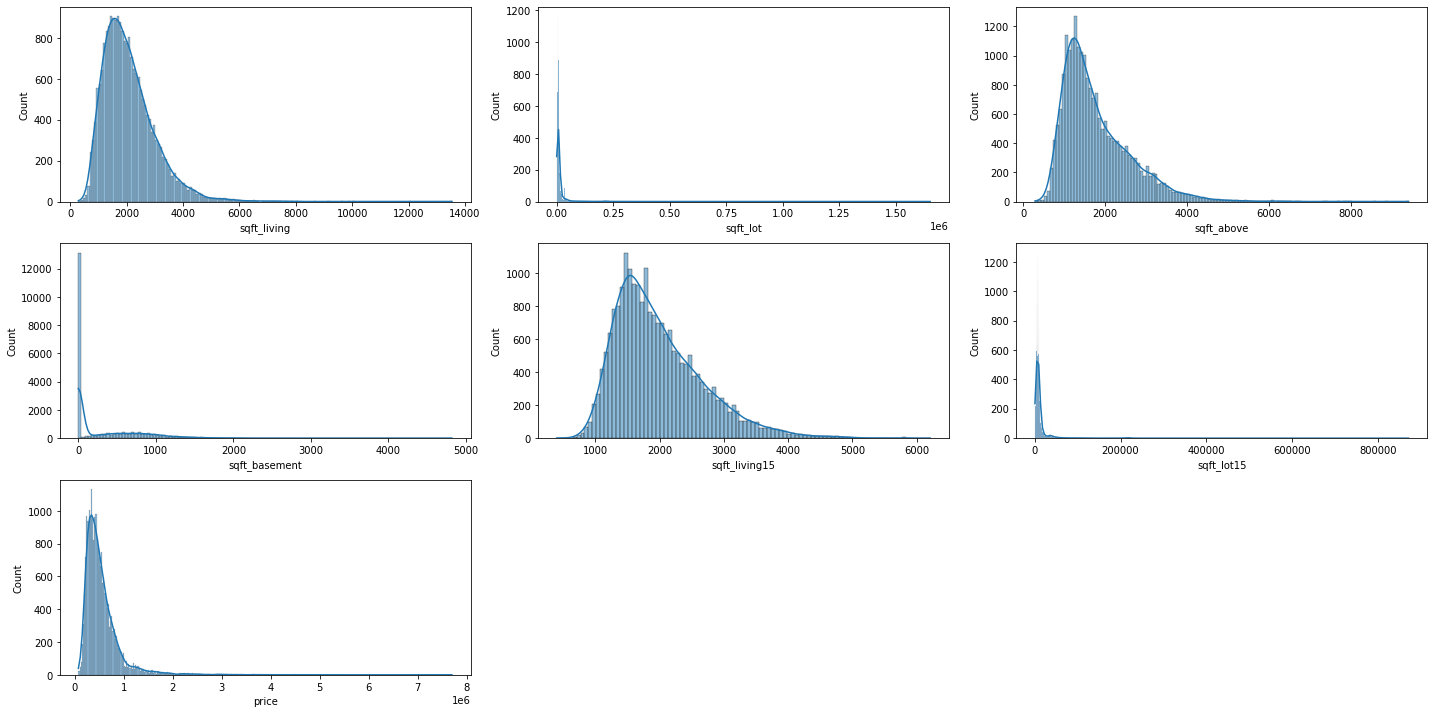

In [13]:
df1 = df[['sqft_living','sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15','price']]
plotDistribution(df1,3,3) #(df, no of rows, now of fig per row)

## Insights

All the distribution are towards the left of the plot ,well it's always a good idea to transform them and make then normally distributed if possible or as close as possible, one can use the techniques like __Log transformation, square-root transformation or something know as the box-cox transformation__.



## Multivariable analysis

### Price vs sqft_living/sqft_living15

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

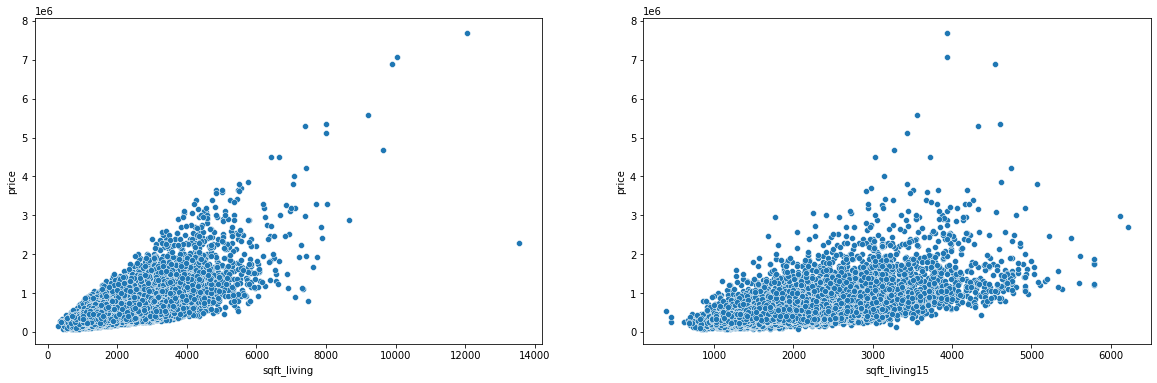

In [14]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.scatterplot(x=df['sqft_living'], y=df['price'], ax=ax[0])
sns.scatterplot(x=df['sqft_living15'], y=df['price'], ax=ax[1])

In [15]:
print("Number of houses whose sqft_living decrease after renovation: ",len(df[df["sqft_living"]>df["sqft_living15"]]))
print("Number of houses whose sqft_living increased after renovation: ",len(df[df["sqft_living"]<df["sqft_living15"]]))
print("Number of houses whose sqft_living remains same after renovation: ",len(df[df["sqft_living"]==df["sqft_living15"]]))

Number of houses whose sqft_living decrease after renovation:  9841
Number of houses whose sqft_living increased after renovation:  9206
Number of houses whose sqft_living remains same after renovation:  2566


### Conclusion:

About 88% of the houses were renovated before selling . Does is affect the price the answer is yes. But thing to notice here is the correlation between the __price__ and the __sqft_living15__ has slightly decrease as compare to the correlation between __price__ and __sqft_living__.

## Condition vs Price

<AxesSubplot:xlabel='condition', ylabel='price'>

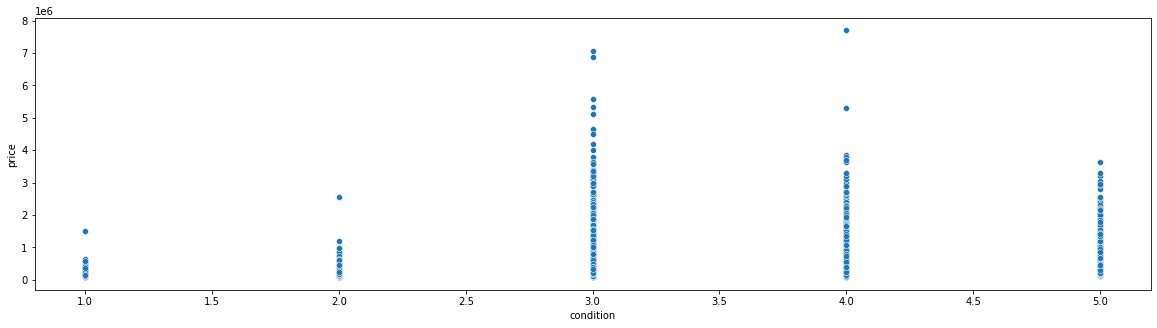

In [16]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df['condition'], y=df['price'])

## Grade vs Price

<AxesSubplot:xlabel='grade', ylabel='price'>

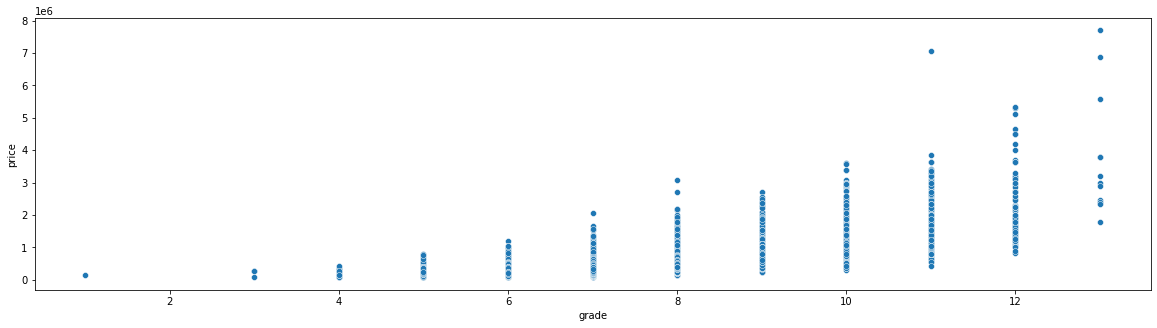

In [17]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df['grade'], y=df['price'])

The better the grade the more the price

# Correlation

<AxesSubplot:>

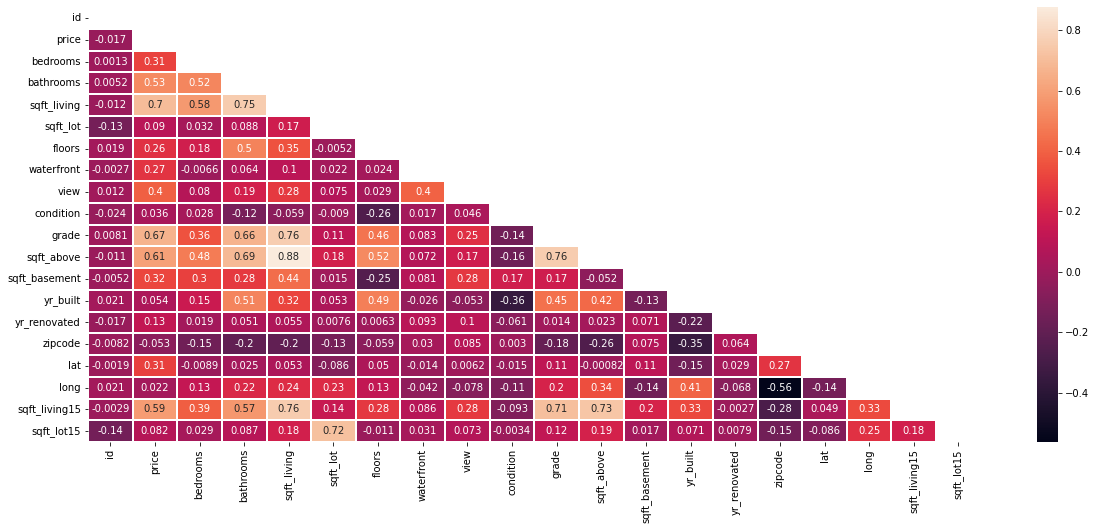

In [18]:
plt.figure(figsize=(20,8))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, linewidths=0.2, mask=mask)

## Price correlation with other features

In [19]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

### Insight:

Top five features that are affecting the price are: 
1. sqft_living
2. grade
3. sqft_above 
4. sqft_living15
5. bathrooms

# Outlier Analysis

In [20]:
def plotBoxPlot(df1, nRows, nGraphPerRow):
    track = [[0]*nGraphPerRow]*nRows
    columnNames = df1.columns
        
    fig, ax = plt.subplots(nrows=nRows, ncols=nGraphPerRow, figsize=(20,10))
       
    row, col, i = 0,0,0
    while i<(len(columnNames)):
        if col<=nGraphPerRow-1:
            sns.boxplot(df[columnNames[i]],ax=ax[row][col])
            col+=1
        else:
            col=0
            row+=1
            i-=1
        i+=1
            
    for j in range(col,nGraphPerRow):
        fig.delaxes(ax[row][j])
    
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

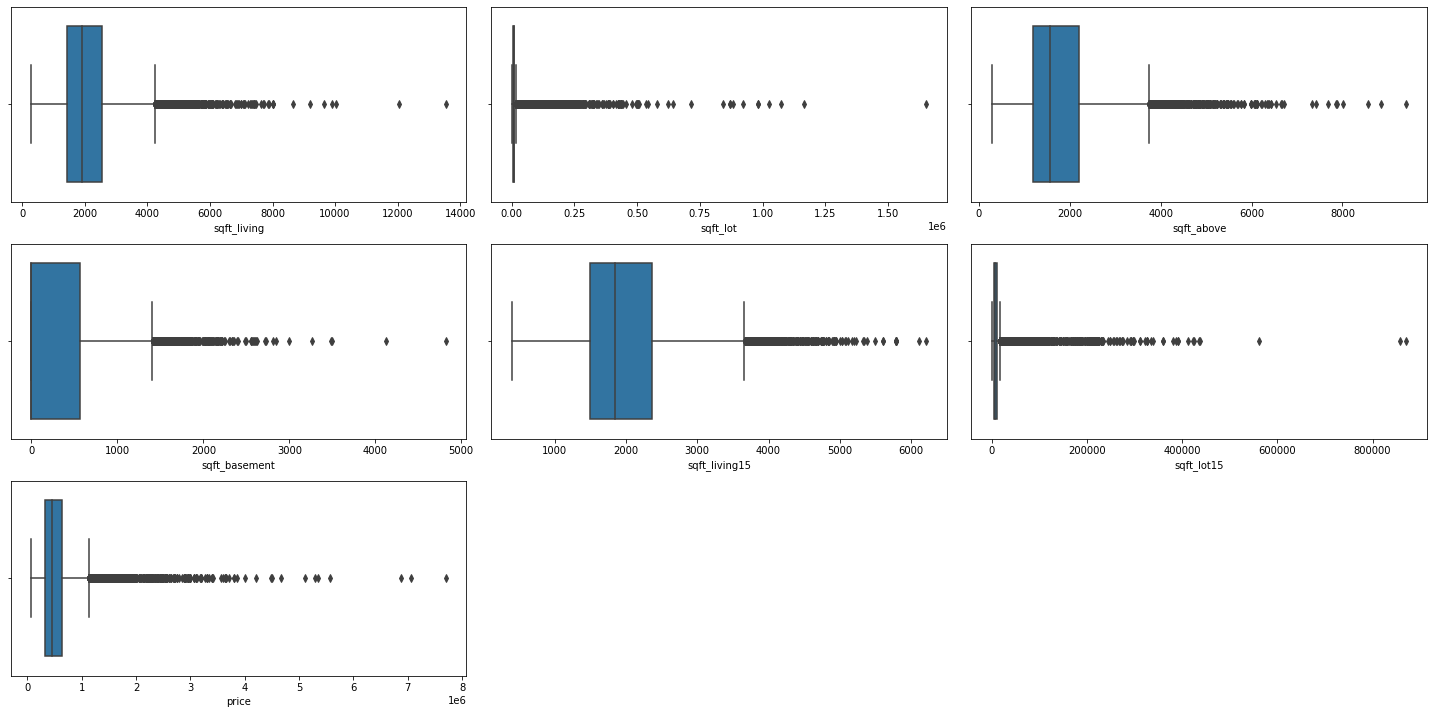

In [21]:
df1 = df[['sqft_living','sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15','price']]
plotBoxPlot(df1,3,3)

# Data preprocessing

In [22]:
clean_data = df.drop(columns=['id','date','zipcode']) # droping the unwanted columns
clean_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [23]:
clean_data.to_csv('clean_data.csv',index=False) #Don't pay attention to this, needed it 
                                                #for the validation

## Feature Scalling

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scaler = RobustScaler()
arr = scaler.fit_transform(clean_data)
rs_data = pd.DataFrame(arr, columns=clean_data.columns)
rs_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,-0.706083,0.0,-1.666667,-0.650045,-0.348442,-0.5,0.0,0.0,0.0,0.0,-0.372549,0.000000,-0.434783,0.0,-0.292754,-0.133005,-0.574713,-0.395344
1,0.272404,0.0,0.000000,0.587711,-0.066572,0.5,0.0,0.0,0.0,0.0,0.598039,0.714286,-0.521739,1991.0,0.720773,-0.438424,-0.172414,0.003813
2,-0.835784,-1.0,-1.666667,-1.015138,0.421742,-0.5,0.0,0.0,0.0,-1.0,-0.774510,0.000000,-0.913043,0.0,0.802415,-0.014778,1.011494,0.088702
3,0.476706,1.0,1.000000,0.044524,-0.463527,-0.5,0.0,0.0,2.0,0.0,-0.500000,1.625000,-0.217391,0.0,-0.246377,-0.802956,-0.551724,-0.525788
4,0.185730,0.0,-0.333333,-0.204809,0.081799,-0.5,0.0,0.0,0.0,1.0,0.117647,0.000000,0.260870,0.0,0.217391,0.911330,-0.045977,-0.023480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.278595,0.0,0.333333,-0.338379,-1.148548,1.5,0.0,0.0,0.0,1.0,-0.029412,0.000000,0.739130,0.0,0.615942,-0.571429,-0.356322,-1.226370
21609,-0.154775,1.0,0.333333,0.356189,-0.319582,0.5,0.0,0.0,0.0,1.0,0.735294,0.000000,0.847826,0.0,-0.295169,-0.650246,-0.011494,-0.084287
21610,-0.148271,-1.0,-2.000000,-0.792520,-1.109773,0.5,0.0,0.0,0.0,0.0,-0.529412,0.000000,0.739130,0.0,0.109179,-0.339901,-0.942529,-1.126430
21611,-0.154775,0.0,0.333333,-0.276046,-0.925992,0.5,0.0,0.0,0.0,1.0,0.039216,0.000000,0.630435,0.0,-0.180193,0.793103,-0.494253,-1.270921


# Train Test Split

In [25]:
X = rs_data.drop(columns=['price'], axis =1)
y = rs_data['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
len(X_train), len(X_test)

(15129, 6484)

## Linear regression Model (including all the features)

In [26]:
RSME, R_sqr = [],[] 

In [27]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.intercept_)
print(lr.coef_)

-0.13085387544321986
[-1.01345619e-01  9.62221319e-02  3.14774599e-01  1.60991334e-03
 -1.15024934e-03  1.70445841e+00  1.60620188e-01  8.47278664e-02
  2.97166293e-01  2.91075954e-01  1.01061432e-01 -3.47913583e-01
  7.37812508e-05  3.56247021e-01 -6.44707636e-02  5.80719868e-02
 -5.18468190e-03]


In [28]:
#predicting the test set result
y_pred = lr.predict(X_test)

In [29]:
comparison = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
comparison['Predicted'] = comparison['Predicted'].round(2)
comparison.head(10)

,Actual,Predicted
735,-0.263117,0.04
2830,1.284631,1.00
4106,1.820152,2.37
16218,3.219316,3.68
19964,0.807924,0.88
1227,-0.739824,-0.57
18849,1.052469,1.09
19369,0.711964,0.31
20164,-0.202755,-0.24
7139,0.479802,0.07


It works,though it is not accurate e.g the first data is off by 100K same goes for other obsevation so the price varies more or less between 100K to 150K which is pretty good.

## Model evaluation

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score (R^2):",lr.score(X_test,y_test))

RSME.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
R_sqr.append(lr.score(X_test,y_test))

MAE: 0.3959034279028227
MSE: 0.4225079049446825
RMSE: 0.6500060806982366
Score (R^2): 0.6945727324117914


# Linear regression model using selected features

## Feature Selection

Here we're using the SFS(SequentialFeatureSelection) to get the best features that are highly correlated with the price.

In [31]:
clean_data.shape

(21613, 18)

In [32]:
sfs = SFS(LinearRegression(), 
           k_features=17, # tweak this value to see the diffrence inn the output
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=10)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s finished

[2022-11-18 19:17:03] Features: 1/17 -- score: 0.4929956607453871[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s finished

[2022-11-18 19:17:04] Features: 2/17 -- score: 0.5681398602420356[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s finished

[2022-11-18 19:17:05] Features: 3/17 -- score: 0.6127892564400202[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

# Side Note: 
After further testing with SFS, Removing features here doesn't do much, apparently, the score doesn't variate much and scaling seems to be the best apporach, so going to keep the entirety of the data!

In [33]:
lr1 = LinearRegression()
lr1.fit(X_train,y_train)
print(lr1.intercept_)
print(lr1.coef_)

-0.13085387544321986
[-1.01345619e-01  9.62221319e-02  3.14774599e-01  1.60991334e-03
 -1.15024934e-03  1.70445841e+00  1.60620188e-01  8.47278664e-02
  2.97166293e-01  2.91075954e-01  1.01061432e-01 -3.47913583e-01
  7.37812508e-05  3.56247021e-01 -6.44707636e-02  5.80719868e-02
 -5.18468190e-03]


In [34]:
lr1_predict = lr1.predict(X_test)

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, lr1_predict))  
print('MSE:', metrics.mean_squared_error(y_test, lr1_predict))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr1_predict)))
print("Score (R^2):",lr1.score(X_test,y_test))

RSME.append(np.sqrt(metrics.mean_squared_error(y_test, lr1_predict)))
R_sqr.append(lr1.score(X_test,y_test))

MAE: 0.3959034279028227
MSE: 0.4225079049446825
RMSE: 0.6500060806982366
Score (R^2): 0.6945727324117914


Not bad, the result is very much close to what we have when we included all the feature to train our model, but this time the only diffrence is that we train it on some selected features, will say it is much better since we are getting the same result with fewer feature. (tweak the value of k estimaters to see how our model behaves)

# Lets try some other algorithms using the same features and see the difference

## Random forest regressor

In [36]:
rf = RandomForestRegressor(n_estimators=100,criterion='squared_error',n_jobs=2)
rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=2)

In [37]:
rf_predict = rf.predict(X_test)

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_predict))  
print('MSE:', metrics.mean_squared_error(y_test, rf_predict))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))
print("Score (R^2):",rf.score(X_test,y_test))

RSME.append(np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))
R_sqr.append(rf.score(X_test,y_test))

MAE: 0.22966597645471207
MSE: 0.2009616683083883
RMSE: 0.44828748399703094
Score (R^2): 0.8547265683716969


## Support Vector Regression

In [39]:
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)

SVR()

In [40]:
svr_predict = svr.predict(X_test)

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_predict))  
print('MSE:', metrics.mean_squared_error(y_test, svr_predict))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_predict)))
print("Score (R^2):",svr.score(X_test,y_test))

RSME.append(np.sqrt(metrics.mean_squared_error(y_test, svr_predict)))
R_sqr.append(svr.score(X_test,y_test))

MAE: 0.5678604052093551
MSE: 1.059655897979371
RMSE: 1.0293958898205156
Score (R^2): 0.23398402321977163


Well this model is pretty bad, Don't really have a definite awnser why, Leave that as an exercice for the reader XD

## XGB Regressor

In [42]:
from xgboost import XGBRegressor, plot_importance

xgb = XGBRegressor(n_estimators=100, learning_rate=0.08)

In [43]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [44]:
xgb_predict = xgb.predict(X_test)

In [45]:
xgb.score(X_test,y_test)

0.8632035724237053

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, xgb_predict))  
print('MSE:', metrics.mean_squared_error(y_test, xgb_predict))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, xgb_predict)))
print("Score (R^2):",xgb.score(X_test,y_test))

RSME.append(np.sqrt(metrics.mean_squared_error(y_test, xgb_predict)))
R_sqr.append(xgb.score(X_test,y_test))

MAE: 0.2217897171466627
MSE: 0.1892351409079253
RMSE: 0.4350116560598409
Score (R^2): 0.8632035724237053


### Model comparison

In [47]:
labels=['lr','lr1','rf','svr','xgb']
plot = pd.DataFrame({'labels':labels,"RSME":RSME,"R-sqr":R_sqr})
plot.head()

,labels,RSME,R-sqr
0,lr,0.650006,0.694573
1,lr1,0.650006,0.694573
2,rf,0.448287,0.854727
3,svr,1.029396,0.233984
4,xgb,0.435012,0.863204


## Conclusion 

__XGB regressor__ gives us the best result. So we will carry forward with XGB regressor. Before that let's try to tune our random forest model and see if it can give use better result that XGB regressor.

__NOTE:__ While comparing multiple linear regression model, RMSE is better choice then R square. 

# Hyper-parameter Tuning

In [48]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 4, 6, 8]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

Using RandomizedSearch, we're gonna run through all the hyperparameters possible to get the best possible ones to run through the XGB regressor model.

In [49]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=96; total time=   3.1s
[CV] END max_depth=80, max_features=sqrt, min_samples_leaf=6, min_samples_split=5, n_estimators=313; total time=   9.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=53; total time=   4.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=53; total time=   4.2s
[CV] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=226; total time=  23.3s
[CV] END max_depth=110, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=183; total time=  17.6s
[CV] END max_depth=110, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=183; total time=  17.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimat

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [10, 53, 96, 140, 183,
                                                         226, 270, 313, 356,
                                                         400]},
                   random_state=42, verbose=2)

This is useful for 2 things, First of all obviously getting the best hyperparameters for the best results, but also reducing computing power needed to run the model

In [50]:
#Knowning the best params
rf_random.best_params_

{'n_estimators': 270,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90}

In [51]:
rf_predict = rf_random.predict(X_test)

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_predict))  
print('MSE:', metrics.mean_squared_error(y_test, rf_predict))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))
print("Score (R^2):",rf_random.score(X_test,y_test))

RSME.append(np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))
R_sqr.append(rf_random.score(X_test,y_test))

MAE: 0.22840100784951128
MSE: 0.20049518867906688
RMSE: 0.4477668910036414
Score (R^2): 0.8550637824140894


### Model Comparison

In [53]:
labels=['lr','lr1','rf','svr','xgb', "RF_tune"]
plot = pd.DataFrame({'labels':labels,"RSME":RSME,"R-sqr":R_sqr})
plot

,labels,RSME,R-sqr
0,lr,0.650006,0.694573
1,lr1,0.650006,0.694573
2,rf,0.448287,0.854727
3,svr,1.029396,0.233984
4,xgb,0.435012,0.863204
5,RF_tune,0.447767,0.855064


Nice! the hyperparameter tuning give us much better results then XGB regressor. One thing to keep in mind while performing hyperparameter tuning, the more the parameters are the more time it will take to compute, so choose your parameters wisely.